In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline

import plotly.offline as py
from plotly import tools
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [8]:
df = pd.read_csv("/kaggle/input/chennai-water-management/chennai_reservoir_levels.csv")
df["Date"] = pd.to_datetime(df["Date"], format='%d-%m-%Y')
df.head()

,Date,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
0,2004-01-01,3.9,0.0,268.0,0.0
1,2004-01-02,3.9,0.0,268.0,0.0
2,2004-01-03,3.9,0.0,267.0,0.0
3,2004-01-04,3.9,0.0,267.0,0.0
4,2004-01-05,3.8,0.0,267.0,0.0


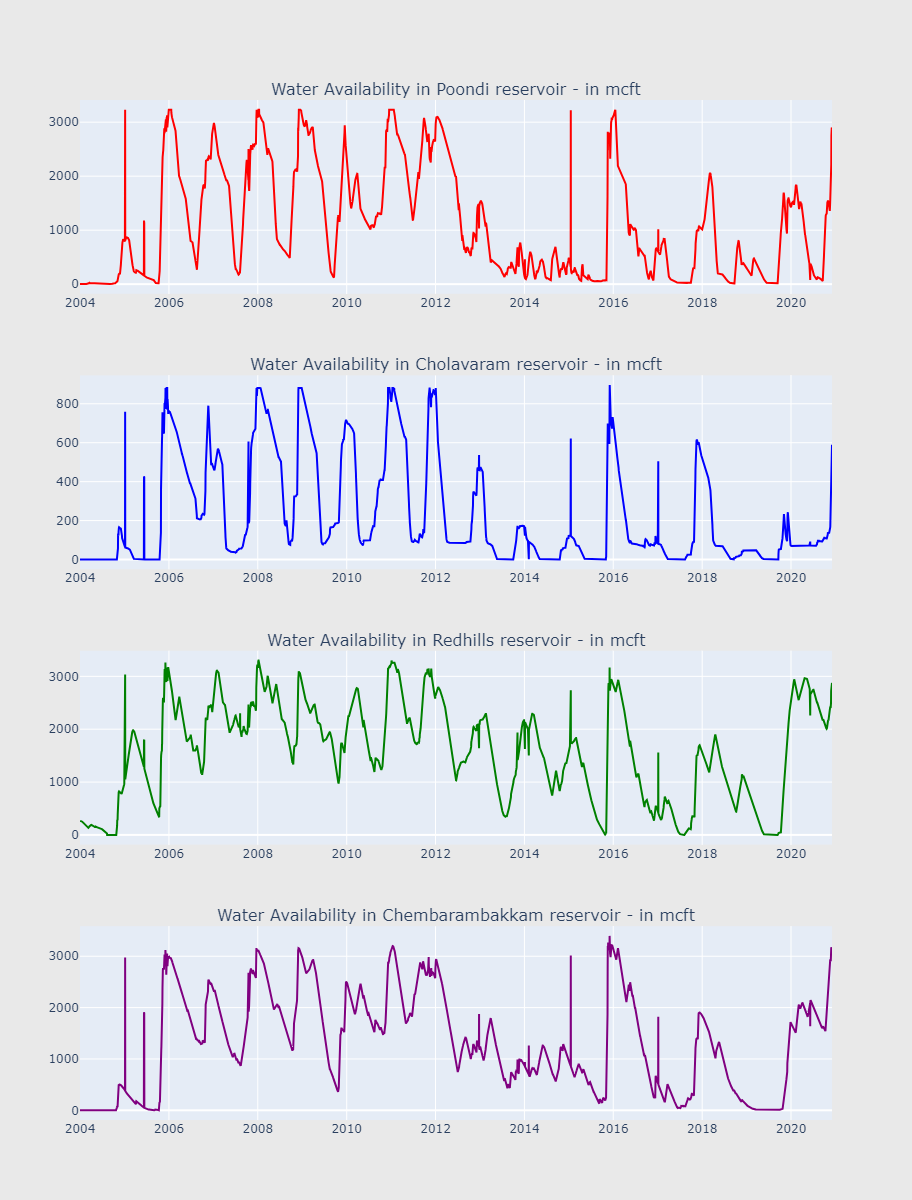

In [9]:
import pandas as pd
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Assuming df is already loaded and "Date" column is already converted to datetime
# df = pd.read_csv("/path/to/your/csv")
# df["Date"] = pd.to_datetime(df["Date"], format='%d-%m-%Y')

def scatter_plot(cnt_srs, color):
    trace = go.Scatter(
        x=cnt_srs.index[::-1],
        y=cnt_srs.values[::-1],
        mode='lines',  # Assuming you want a line plot; use 'markers' for scatter plot
        showlegend=False,
        marker=dict(
            color=color,
        ),
    )
    return trace

cnt_srs = df["POONDI"]
cnt_srs.index = df["Date"]
trace1 = scatter_plot(cnt_srs, 'red')

cnt_srs = df["CHOLAVARAM"]
cnt_srs.index = df["Date"]
trace2 = scatter_plot(cnt_srs, 'blue')

cnt_srs = df["REDHILLS"]
cnt_srs.index = df["Date"]
trace3 = scatter_plot(cnt_srs, 'green')

cnt_srs = df["CHEMBARAMBAKKAM"]
cnt_srs.index = df["Date"]
trace4 = scatter_plot(cnt_srs, 'purple')

subtitles = [
    "Water Availability in Poondi reservoir - in mcft",
    "Water Availability in Cholavaram reservoir - in mcft",
    "Water Availability in Redhills reservoir - in mcft",
    "Water Availability in Chembarambakkam reservoir - in mcft"
]

fig = make_subplots(rows=4, cols=1, vertical_spacing=0.08, subplot_titles=subtitles)

fig.add_trace(trace1, row=1, col=1)
fig.add_trace(trace2, row=2, col=1)
fig.add_trace(trace3, row=3, col=1)
fig.add_trace(trace4, row=4, col=1)

fig.update_layout(height=1200, width=800, paper_bgcolor='rgb(233,233,233)')

fig.show()


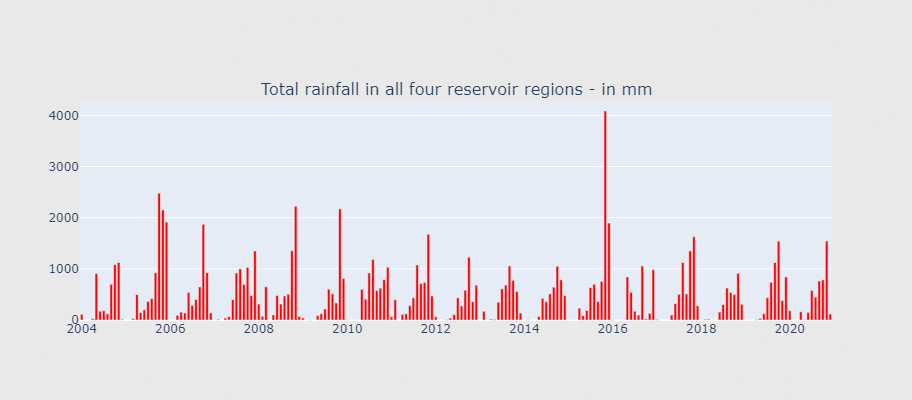

In [10]:
import pandas as pd
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Load the data
rain_df = pd.read_csv("/kaggle/input/chennai-water-management/chennai_reservoir_rainfall.csv")
rain_df["Date"] = pd.to_datetime(rain_df["Date"], format='%d-%m-%Y')

# Calculate total rainfall
rain_df["total"] = rain_df["POONDI"] + rain_df["CHOLAVARAM"] + rain_df["REDHILLS"] + rain_df["CHEMBARAMBAKKAM"]

# Define the bar plot function
def bar_plot(cnt_srs, color):
    trace = go.Bar(
        x=cnt_srs.index[::-1],
        y=cnt_srs.values[::-1],
        showlegend=False,
        marker=dict(
            color=color,
        ),
    )
    return trace

# Create YearMonth column
rain_df["YearMonth"] = pd.to_datetime(rain_df["Date"].dt.year.astype(str) + rain_df["Date"].dt.month.astype(str), format='%Y%m')

# Group data by YearMonth and sum total rainfall
cnt_srs = rain_df.groupby("YearMonth")["total"].sum()
trace5 = bar_plot(cnt_srs, 'red')

# Create subplots
fig = make_subplots(rows=1, cols=1, vertical_spacing=0.08, subplot_titles=["Total rainfall in all four reservoir regions - in mm"])
fig.add_trace(trace5, row=1, col=1)

# Update layout
fig.update_layout(height=400, width=800, paper_bgcolor='rgb(233,233,233)')

# Plot the figure
fig.show()


/opt/conda/lib/python3.10/site-packages/plotly/tools.py:455: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



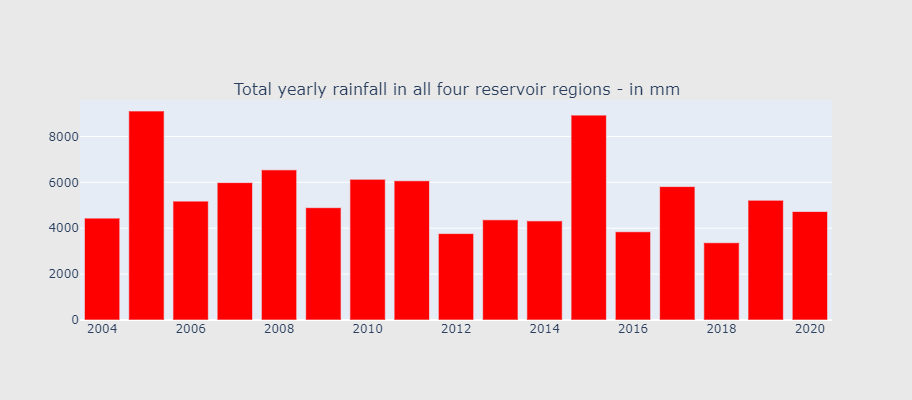

In [11]:
rain_df["Year"] = pd.to_datetime(rain_df["Date"].dt.year.astype(str), format='%Y')

cnt_srs = rain_df.groupby("Year")["total"].sum()
trace5 = bar_plot(cnt_srs, 'red')

fig = tools.make_subplots(rows=1, cols=1, vertical_spacing=0.08,
                          subplot_titles=["Total yearly rainfall in all four reservoir regions - in mm"])
fig.append_trace(trace5, 1, 1)


fig['layout'].update(height=400, width=800, paper_bgcolor='rgb(233,233,233)')
py.iplot(fig, filename='h2o-plots')